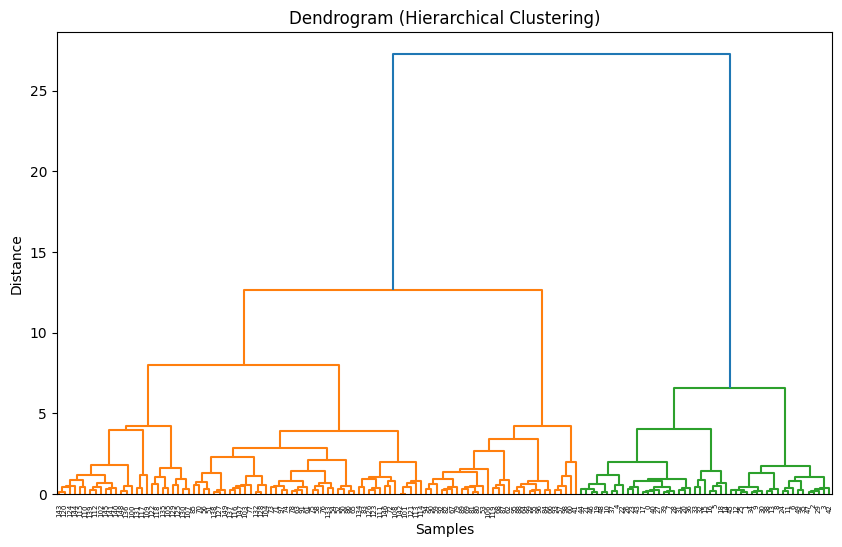

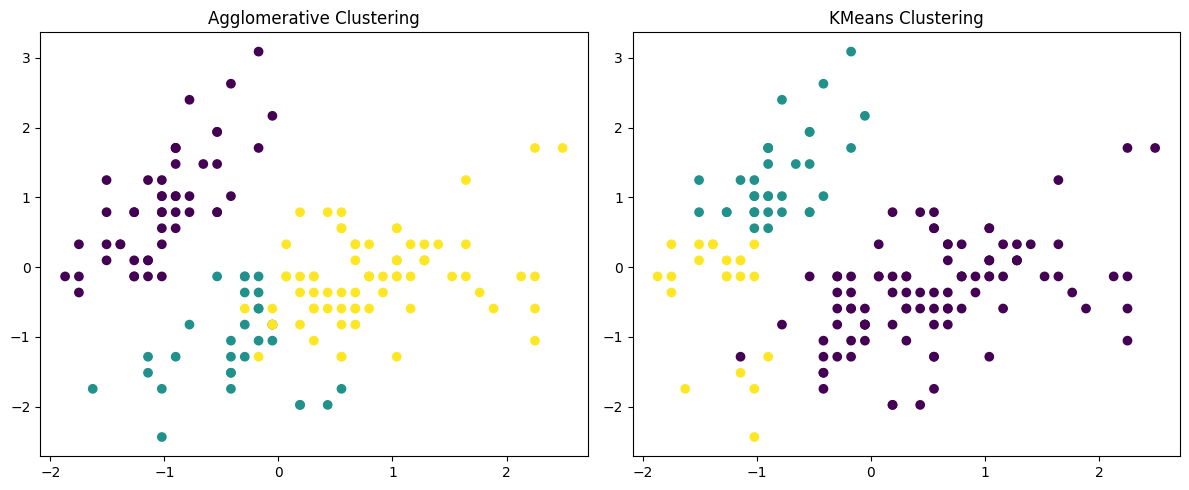

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')  # You can try: 'single', 'complete', 'average'

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

from scipy.cluster.hierarchy import fcluster
hier_labels = fcluster(linked, 3, criterion='maxclust')

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, cmap='viridis')
plt.title("Agglomerative Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")

plt.tight_layout()
plt.show()
